In [2]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image


In [18]:
# 

def convolutional_layer2D(picture, filters, stride = 1):
    """
    Variables:
    picture (ndarray): 1 x n x m matrix of black white pictures where n - width, m - height of picture
              3 x n x m  tensor of 3 matrices of RGB picture where n - width, m - height and every matrix represents 
             different color
    filters( ndarray): tensor of filters
    stride (integer)
    """
    if type(picture) != np.ndarray or type(filters) != np.ndarray:
        raise Exception("Wrong Input")
        
    number_of_filters = filters.shape[0]
    filter_height = filters.shape[1]
    filter_width = filters.shape[2]
    number_of_picture_layers = picture.shape[0]
    height = picture.shape[1]
    width = picture.shape[2]
    
    results = np.zeros((number_of_picture_layers,number_of_filters, (height - filter_height)//stride + 1, (width - filter_width) // stride + 1))
   
    for current_layer in range(number_of_picture_layers):
        #iteration over picture layers (RGBT - 3, BlackWhite - 1)
        for current_filter in range(number_of_filters):
        # iteration over filters 
            for current_height in range((height - filter_height) // stride + 1):
                for current_width in range((width - filter_width) // stride + 1):
                    additional_array = picture[current_filter, stride *current_height : stride * current_height + filter_height, stride* current_width : stride *current_width + filter_width]
                    additional_array = np.multiply(additional_array, filters[current_filter])
                    results[current_layer, current_filter, current_height, current_width] = np.sum(additional_array)
    return results
                    
                    
        
        
        
    

In [19]:
## tu jest niestety coś zle ale nie zdązylem tego naprawić

def convolutional_layer2D_Matrix_Multiplication(picture, filters):
    """
    Variables:
    picture (ndarray): n x m matrix of black white pictures where n - width, m - height of picture
    filters( ndarray): tensor of filters
    """
    height = picture.shape[0]
    width = picture.shape[1]
    number_of_filters = filters.shape[0]
    filter_height = filters.shape[1]
    filter_width = filters.shape[2]
    
    results = np.zeros((number_of_filters, height - filter_height + 1, width - filter_width + 1))

    
    width_of_reshaped = (height - filter_height + 1) * (width - filter_width + 1)
    height_of_reshaped = height * width
    
    picture_matrix_reshaped = np.zeros((height_of_reshaped, width_of_reshaped ))
    
    iterator = 0
    for current_filter in range(number_of_filters):
        current_filter_reshaped = filters[current_filter].reshape(1,height_of_reshaped)
        for current_height in range(height - filter_height + 1):
            for current_width in range(width - filter_width + 1):
                current_array = picture[current_filter,current_height : current_height + filter_height, current_width : current_width + filter_width]
                current_array = current_array.reshape(height_of_reshaped,1)
                picture_matrix_reshaped[:,i] = current_array
                i = i + 1;
        new_matrix = current_filter_reshaped @ picture_matrix_reshaped
        new_matrix = new_matrix.reshape(height - filter_height + 1, width - filter_width + 1)
        results[current_filter,:,:] = new_matrix
    return results
        
    
    
        

In [44]:
filters = np.array([[[3,2],[4,1]]])


In [46]:
lion = mpimg.imread("lion.png")
new_lion = np.array([lion])
new_lion.shape





(1, 183, 275)

Lion before

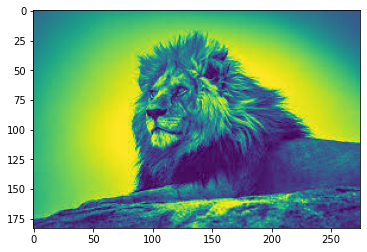

In [34]:
plt.imshow(lion)

In [21]:
results = convolutional_layer2D(new_lion, filters)

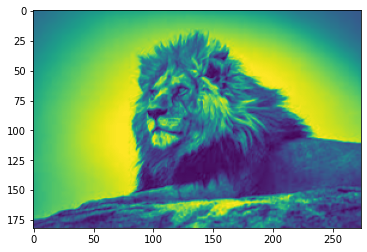

In [39]:
our_picture = results[0,0,:,:]
plt.imshow(our_picture)

In [47]:
our_picture.shape

(182, 274)

Lion after